In [1]:
import numpy as np
import os
from netCDF4 import Dataset

import cartopy.crs as ccrs
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('C:/Users/Adam.000/Dropbox/Code/DisCo/'))
sys.path.append(module_path)
from visuals import *

In [3]:
matplotlib.use("TkAgg")
%matplotlib inline

In [4]:
mpl.rcParams['axes.linewidth'] = 3.0

## Vortex decays

In [5]:
result = '15'
past_depth = 14
future_depth = 2
transient = 50

data_file = "C:/Users/Adam.000/Dropbox/Data/fluid2d/twodimturb_03/twodimturb_03_his.nc"
data = Dataset(data_file)
time_data = data['t'][transient+past_depth:-future_depth]

In [6]:
counts_15 = np.load("D:/Adam/Extracted-Disco-Data/vortex_counts-15.npy")
counts = counts_15[45:] 
times = time_data[45:]

In [7]:
def powerlaw(x, a,k):
    return a*x**(k)

In [8]:
popt, pcov = curve_fit(powerlaw, times, counts)

In [9]:
popt

array([ 6.94255284e+04, -9.07078501e-01])

In [10]:
fit = popt[0]*times**(popt[1])

In [11]:
cb_blue = "#377eb8"
cb_red = "#e41a1c"
cb_green = "#4daf4a"
cb_brown = "#a65628"

cb_pink = "#f781bf"

In [12]:
A = 36_000.0
theorya = A*times**(-0.75)
theorya[:80] = np.nan
theorya[-380:] = np.nan

B = 33_000.0
theoryb = B*times**(-0.71)
theoryb[:80] = np.nan
theoryb[-380:] = np.nan

(array([4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  ]),
 <a list of 10 Text major ticklabel objects>)

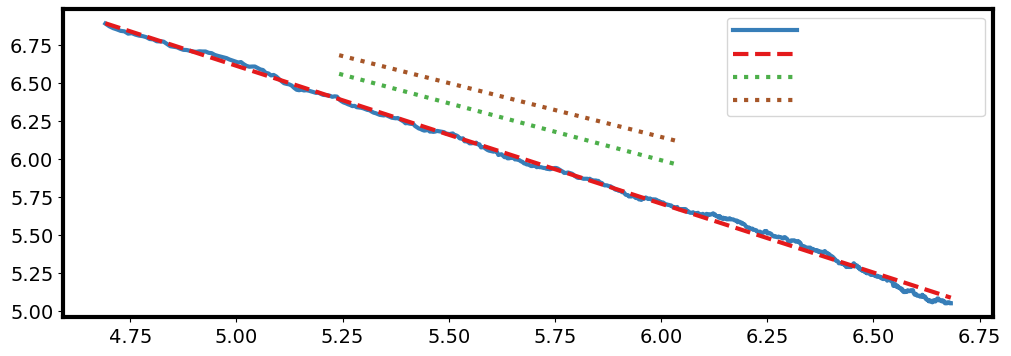

In [13]:
plt.subplots(figsize = (12,4.0))
plt.plot(np.log(times), np.log(counts), color=cb_blue, linewidth=3.0, label="                               ")
plt.plot(np.log(times), np.log(fit), "--", color=cb_red, linewidth=3.0, label="                                ")
plt.plot(np.log(times), np.log(theorya), ":", color=cb_green, linewidth=3.0, label = "                              ")
plt.plot(np.log(times), np.log(theoryb), ":", color=cb_brown, linewidth=3.0, label = "                              ")
plt.legend(prop={'size': 12}, handlelength=3.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('vortex_decay.pdf', bbox_inches='tight')

## Vorticity and vortex local causal states over time

In [20]:
data_file = "D:Adam/Extracted-Disco-Data/turb/twodimturb_03_his.nc"
data = Dataset(data_file)
turbfield = data['vorticity']
np.shape(turbfield)

(801, 640, 640)

In [14]:
lcsdir = "D:Adam/Extracted-Disco-Data/turb/result-15/fields/"
lcsfiles = sorted(os.listdir(lcsdir))

In [15]:
lcs_fields = []

for file in lcsfiles:
    lcs_field = np.load(lcsdir + file)
    lcs_fields.append(lcs_field)

statefield = np.vstack(lcs_fields)
np.shape(statefield)

(735, 640, 640)

In [16]:
t_1 = 136
t_2 = 300
t_3 = 620
print(np.log(t_1))
print(np.log(t_2))
print(np.log(t_3))

4.912654885736052
5.703782474656201
6.429719478039138


In [17]:
import matplotlib.colors

In [18]:
cvals  = [0, 1, 2]
colors = ["cornflowerblue","firebrick","white"]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
csmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

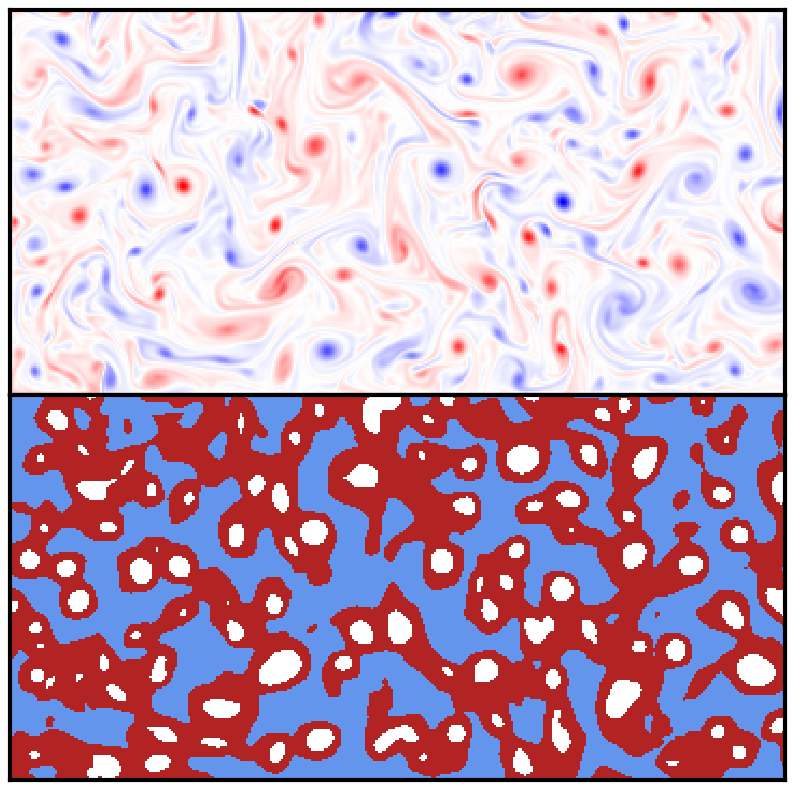

In [21]:
t = t_1
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, sharey=True)
diagram(statefield[t, :180,:360], ax=axes[1],cmap=csmap, ticks=False, size=10)
diagram(turbfield[t+50+14, :180,:360], ax=axes[0], cmap=plt.cm.bwr, ticks=False, size=10)
plt.subplots_adjust(hspace=0)
# plt.savefig('vortices_t1.pdf', bbox_inches='tight')

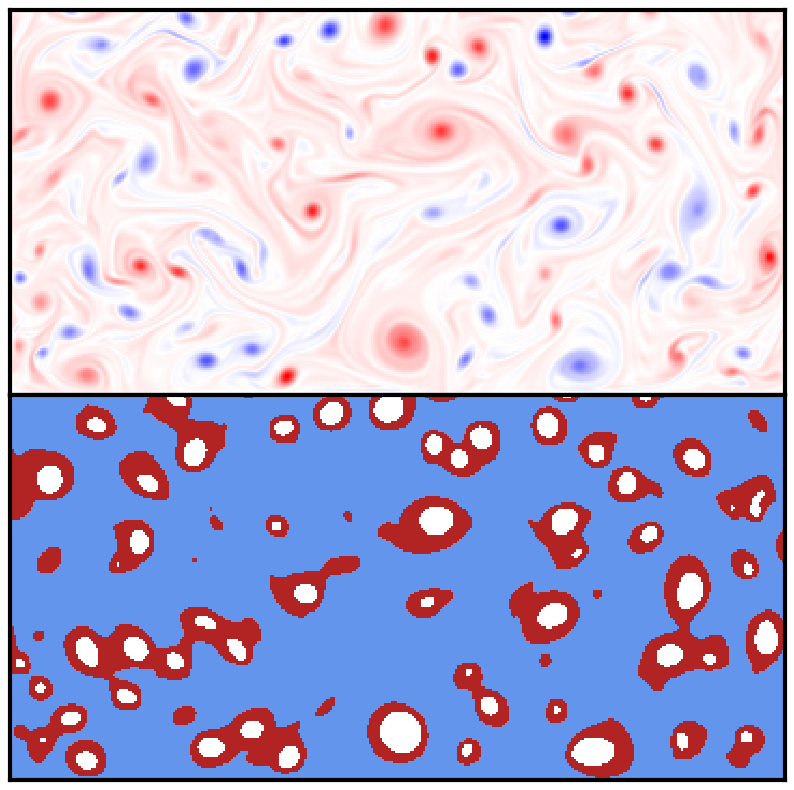

In [22]:
t = t_2
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, sharey=True)
diagram(statefield[t, :180,:360], ax=axes[1],cmap=csmap, ticks=False, size=10)
diagram(turbfield[t+50+14, :180,:360], ax=axes[0], cmap=plt.cm.bwr, ticks=False, size=10)
plt.subplots_adjust(hspace=0)
# plt.savefig('vortices_t2.pdf', bbox_inches='tight')

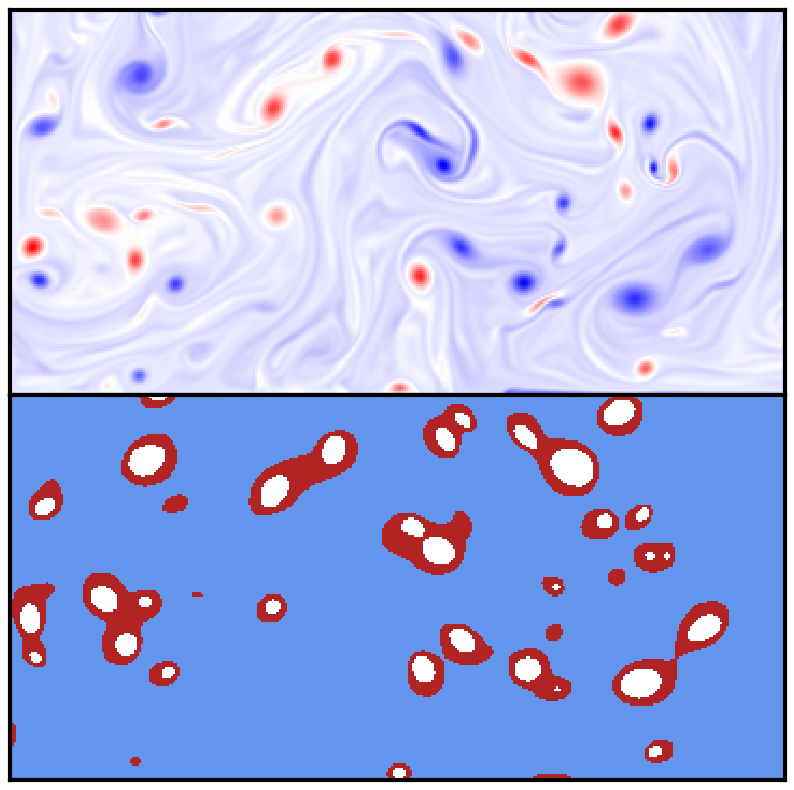

In [23]:
t = t_3
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, sharey=True)
diagram(statefield[t, :180,:360], ax=axes[1],cmap=csmap, ticks=False, size=10)
diagram(turbfield[t+50+14, :180,:360], ax=axes[0], cmap=plt.cm.bwr, ticks=False, size=10)
plt.subplots_adjust(hspace=0)
# plt.savefig('vortices_t3.pdf', bbox_inches='tight')